In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score, mean_squared_error

In [5]:
data=load_diabetes()

In [6]:
X=data.data
y=data.target

In [13]:
X.shape

(442, 10)

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [15]:
X_train.shape

(353, 10)

In [22]:
lr=LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[   1.05637071 -243.56139651  504.98043545  294.15598739 -933.72069649
  599.42576211  132.77932111  140.95255403  830.22125769  102.36482001]
153.50112418882244


In [24]:
y_predict=lr.predict(X_test)
print('r2 score',r2_score(y_test,y_predict))
print('RMSE', np.sqrt(mean_squared_error(y_test,y_predict)))

r2 score 0.5154323693501682
RMSE 49.94526941825977


In [36]:
ridge=Ridge(alpha=100000)
ridge.fit(X_train,y_train)
print(ridge.coef_)
print(ridge.intercept_)

[ 0.00241143  0.00080564  0.00761598  0.00563337  0.00241563  0.00193109
 -0.00532654  0.00563308  0.00724304  0.00513505]
156.53533568940878


In [37]:
y_ridge_predict=ridge.predict(X_test)
print('r2 score',r2_score(y_test,y_ridge_predict))
print('RMSE', np.sqrt(mean_squared_error(y_test,y_ridge_predict)))

r2 score -0.09280862426597536
RMSE 75.00482760588282


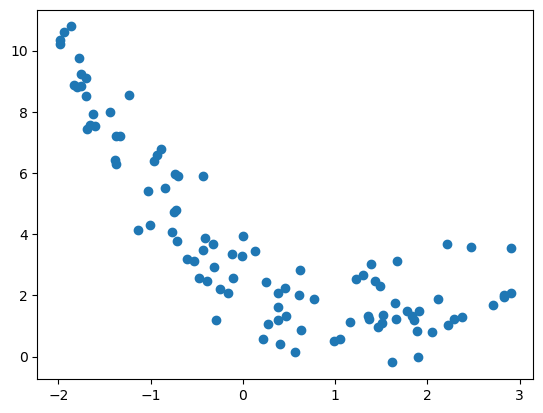

In [38]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

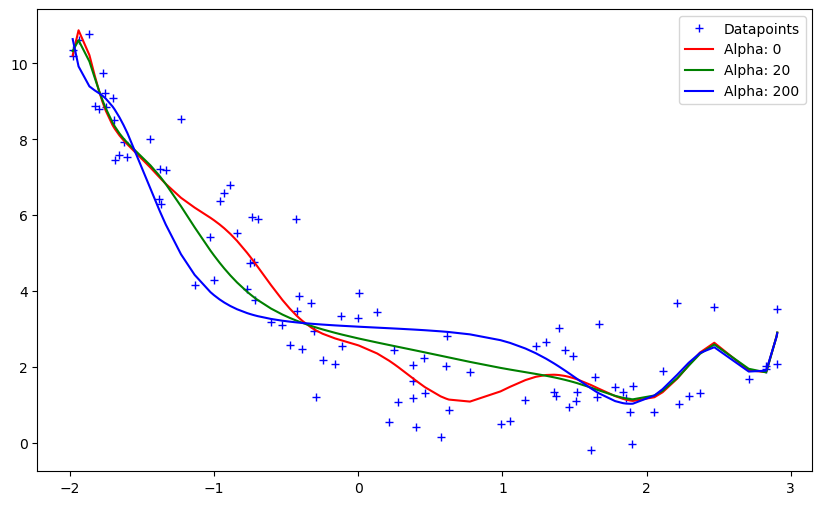

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()